# El dataset MNIST

**Descripcion:** Conjunto de datos que incluye numero escritos a mano que van del 0 al 9
* Creada en el 98, contiene una gran cantidad de datos
* Dataset clasico, equivalente al hola mundo
    * Incluido como ejemplo en la lib TensorFlow

In [11]:
import tensorflow as tf

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
print(tf.__version__)

2.0.0


**NOTA IMPORTANTE** 
para usar los datasets de TensorFlow (no los de keras) debes instalarlo desde consola asi:
```python
pip install tensorflow-datasets
```
DOCS
* https://www.tensorflow.org/datasets
* https://www.tensorflow.org/datasets/catalog/mnist

* **No fue eficiente su uso. Da errores**

In [13]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()#carga de datos
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalizo los rango de datos (0 y 1) apara cada px

In [14]:
len(x_train)

60000

In [15]:
len(y_train)

60000

Visualicemos como vienen las imagenes con un ejemplo:

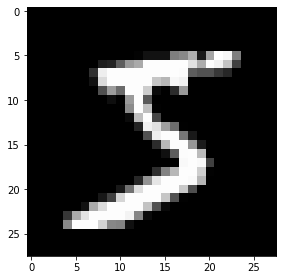

In [16]:
im_temp = x_train[0]
io.imshow(np.reshape(im_temp, (28,28)))

In [17]:
y_train[0]

5

La imagen esta catalogada como un 5

### **Nota**
Puede acceder a la version de tensorflow 1.0 de este ejemplo _desactualizada_ desde: https://github.com/joanby/python-ml-course/blob/master/notebooks/T11%20-%203%20-%20Reconocimiento%20de%20texto%20escrito.ipynb

## Construir el modelo clasificador

In [19]:
modelo = tf.keras.models.Sequential([#modelo secuencial, una capa despues de la otra
    tf.keras.layers.Flatten(input_shape=(28,28)), #capa de aplanado (mejora aprendizaje y eficiencia)
    tf.keras.layers.Dense(128, activation='relu'),#128 neuronas, funcion de activacion: rectificadora
    tf.keras.layers.Dropout(0.2),#20% de esta red no aprende. (mejora eficiencia)
    tf.keras.layers.Dense(10, activation='softmax')#capa de salida (10 posibles numeros). Arroja array de probabilidades entre 0 y 1 para c/u
])

## Compila el modelo

In [32]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])

## Entrena y evalua el modelo

In [33]:
modelo.fit(x_train, y_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - ETA: 13:12 - loss: 0.0102 - accuracy: 1.0000 - sparse_categorical_crossentropy: 0.010 - ETA: 43s - loss: 0.0251 - accuracy: 0.9891 - sparse_categorical_crossentropy: 0.0251  - ETA: 25s - loss: 0.0226 - accuracy: 0.9893 - sparse_categorical_crossentropy: 0.022 - ETA: 17s - loss: 0.0250 - accuracy: 0.9891 - sparse_categorical_crossentropy: 0.025 - ETA: 13s - loss: 0.0217 - accuracy: 0.9911 - sparse_categorical_crossentropy: 0.021 - ETA: 11s - loss: 0.0230 - accuracy: 0.9899 - sparse_categorical_crossentropy: 0.023 - ETA: 10s - loss: 0.0226 - accuracy: 0.9899 - sparse_categorical_crossentropy: 0.022 - ETA: 9s - loss: 0.0209 - accuracy: 0.9909 - sparse_categorical_crossentropy: 0.020 - ETA: 8s - loss: 0.0208 - accuracy: 0.9910 - sparse_categorical_crossentropy: 0.02 - ETA: 7s - loss: 0.0209 - accuracy: 0.9910 - sparse_categorical_crossentropy: 0.02 - ETA: 7s - loss: 0.0211 - accuracy: 0.9913 - sparse_categorica

In [34]:
modelo.evaluate(x_test,  y_test, verbose=2)#verbose 2 indica que no quiero barra de progreso

10000/1 - 1s - loss: 0.0417 - accuracy: 0.9810 - sparse_categorical_crossentropy: 0.0832


[0.08317162714375809, 0.981, 0.083171576]

Los resultados muestran ademas la entropia cruzada, gracias a que la especificamos como metrica al compilar el modelo